In [110]:
import yaml
import os
import numpy as np

from roadvision3d.src.engine.dataloader import build_dataloader
from roadvision3d.src.datasets.kitti import KITTI

from roadvision3d.visualization import Visualizer_dataloader

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load config and build dataloader

In [111]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_KITTI_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
dataset = KITTI(split='train', cfg=cfg['dataset'])

In [112]:
print(dataset.idx_list)

item = 49

print(dataset.idx_list[item])

['000000', '000003', '000007', '000009', '000010', '000011', '000012', '000013', '000014', '000016', '000017', '000018', '000022', '000026', '000029', '000030', '000032', '000034', '000036', '000038', '000041', '000043', '000044', '000045', '000046', '000049', '000051', '000054', '000055', '000056', '000057', '000060', '000064', '000067', '000068', '000069', '000070', '000071', '000072', '000073', '000074', '000075', '000079', '000080', '000082', '000083', '000084', '000085', '000086', '000087', '000088', '000091', '000092', '000095', '000096', '000097', '000099', '000100', '000101', '000103', '000105', '000109', '000110', '000111', '000112', '000113', '000114', '000115', '000119', '000120', '000121', '000123', '000125', '000127', '000129', '000130', '000131', '000133', '000136', '000138', '000141', '000142', '000144', '000145', '000146', '000148', '000149', '000150', '000154', '000155', '000157', '000158', '000160', '000162', '000163', '000164', '000165', '000166', '000171', '000172',

In [113]:
inputs, calib, coord_range, targets, info = dataset.__getitem__(item)
print(inputs.shape)
print(targets.keys())

(3, 384, 1280)
dict_keys(['depth', 'size_2d', 'heatmap', 'offset_2d', 'indices', 'size_3d', 'offset_3d', 'heading_bin', 'heading_res', 'cls_ids', 'mask_2d', 'vis_depth', 'rotation_y', 'position'])


In [114]:
valid_size_2d = targets['size_2d'][targets['mask_2d']==1]

print(targets['cls_ids'])
print(valid_size_2d)
print(targets['mask_2d'].shape)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[52.199677  19.18454  ]
 [10.496613   8.571983 ]
 [ 2.3188477  6.523674 ]]
(50,)


In [115]:
visualizer = Visualizer_dataloader(calib=calib, pitch=0.0, cfg=cfg['dataset'])

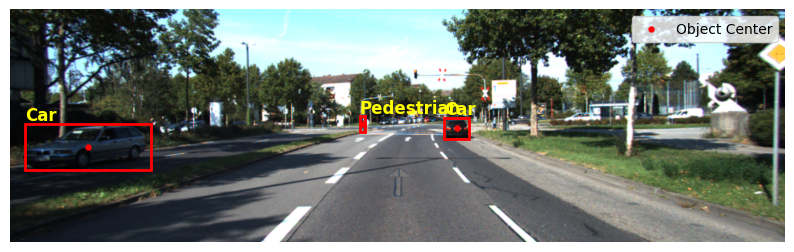

In [116]:
visualizer.draw_2d_bboxes(inputs, targets)

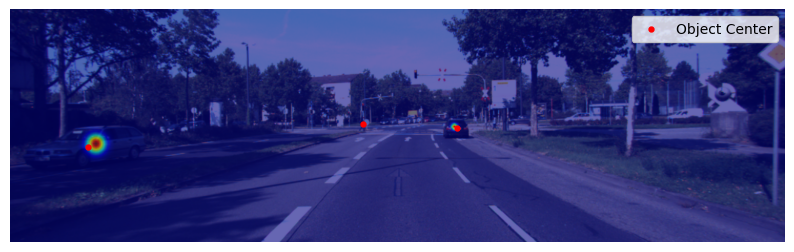

In [117]:
visualizer.draw_heatmaps(inputs, targets)

Object ID: 0
  Depth: 16.52 meters
  3D Size (width, height, length): 1.45, 1.59, 4.28
  Rotation Y (Yaw): 1.63 radians
  Reconstructed Rotation Y: 2.22 radians
  Heading Bin: 4, Heading Residual: 0.13
------------------------------------------------------------
Object ID: 1
  Depth: 33.48 meters
  3D Size (width, height, length): 1.43, 1.59, 4.21
  Rotation Y (Yaw): -1.49 radians
  Reconstructed Rotation Y: 4.65 radians
  Heading Bin: 9, Heading Residual: -0.06
------------------------------------------------------------
Object ID: 2
  Depth: 49.54 meters
  3D Size (width, height, length): 1.72, 0.74, 0.56
  Rotation Y (Yaw): -0.34 radians
  Reconstructed Rotation Y: 6.01 radians
  Heading Bin: 11, Heading Residual: 0.25
------------------------------------------------------------


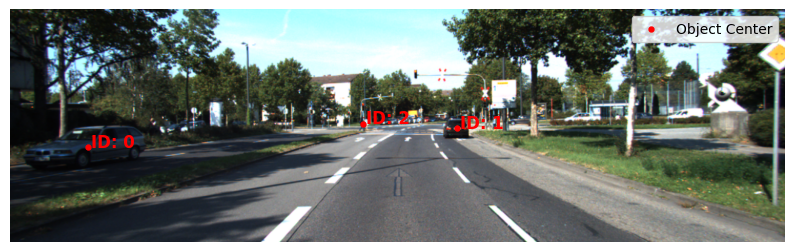

In [118]:
visualizer.display_centers_dimensions_depth(inputs, targets)

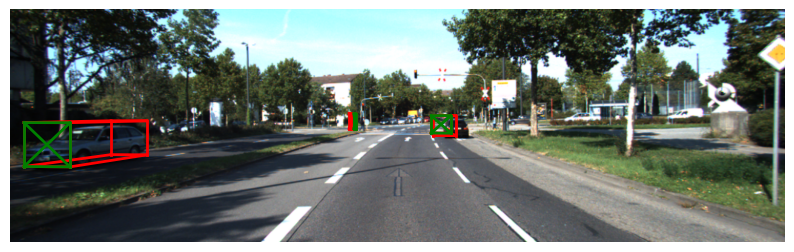

In [119]:
visualizer.draw_3d_bboxes(inputs, targets)
